In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

sns.set_context("paper", font_scale=1)
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

In [297]:
root_path = "/Users/jeong-yeojin/Desktop/testLDA/"
filepath_models = root_path + "models/spleen_tscore"
filepath_df = root_path + "data/spleen/spleen_df.pkl"
filepath_edge = root_path + "data/spleen/"
train_fraction = 0.99
lamb = 4
n_topics = [3, 5, 8, 10]

# Load data/edge
spleen_df = pkl.load(open(filepath_df, "rb"))
spleen_edge = {}
spleen_names = {}
samples = ["BALBc-1", "BALBc-2", "BALBc-3"]
for sample_idx in samples:
    path_to_edge = f"{filepath_edge}" + f"{sample_idx}" + "_edge.csv"
    path_to_names = f"{filepath_edge}" + f"{sample_idx}" + "_D_unnorm.csv"
    spleen_edge[sample_idx] = pd.read_csv(path_to_edge).to_numpy()
    D = pd.read_csv(path_to_names)
    spleen_names[sample_idx] = D.to_numpy()[:, 0]

# Load word-topic weights
spleen_tscore_A_b1 = {}
spleen_tscore_A_b2 = {}
spleen_tscore_A_b3 = {}
sample = "BALBc-1"
for n_topic in n_topics:
    path_to_A = f"{filepath_edge}" + f"{sample}" + "_Ahat_" + f"{n_topic}" + ".csv"
    spleen_tscore_A_b1[n_topic] = pd.read_csv(path_to_A).to_numpy()
sample = "BALBc-1"
for n_topic in n_topics:
    path_to_A = f"{filepath_edge}" + f"{sample}" + "_Ahat_" + f"{n_topic}" + ".csv"
    spleen_tscore_A_b2[n_topic] = pd.read_csv(path_to_A).to_numpy()
sample = "BALBc-1"
for n_topic in n_topics:
    path_to_A = f"{filepath_edge}" + f"{sample}" + "_Ahat_" + f"{n_topic}" + ".csv"
    spleen_tscore_A_b3[n_topic] = pd.read_csv(path_to_A).to_numpy()

# Load doc-topic weights
spleen_tscore_w_b1 = {}
spleen_tscore_w_b2 = {}
spleen_tscore_w_b3 = {}
sample = "BALBc-1"
for n_topic in n_topics:
    path_to_train_model = (
        "_".join(
            (f"{filepath_models}", f"{sample}", f"penalty={lamb}", f"topics={n_topic}")
        )
        + ".pkl"
    )
    with open(path_to_train_model, "rb") as f:
        spleen_tscore_w_b1[n_topic] = pkl.load(f)
sample = "BALBc-2"
for n_topic in n_topics:
    path_to_train_model = (
        "_".join(
            (f"{filepath_models}", f"{sample}", f"penalty={lamb}", f"topics={n_topic}")
        )
        + ".pkl"
    )
    with open(path_to_train_model, "rb") as f:
        spleen_tscore_w_b2[n_topic] = pkl.load(f)
sample = "BALBc-3"
for n_topic in n_topics:
    path_to_train_model = (
        "_".join(
            (f"{filepath_models}", f"{sample}", f"penalty={lamb}", f"topics={n_topic}")
        )
        + ".pkl"
    )
    with open(path_to_train_model, "rb") as f:
        spleen_tscore_w_b3[n_topic] = pkl.load(f)

In [225]:
# Load SLDA
from features import *

filepath_models = root_path + "models/spleen_slda"
spleen_slda_w_b1 = {}
spleen_slda_w_b2 = {}
spleen_slda_w_b3 = {}
for n_topic in n_topics:
    path_to_train_model = (
        "_".join(
            (
                f"{filepath_models}",
                f"penalty={lamb}",
                f"topics={n_topic}",
                f"trainfrac={train_fraction}",
            )
        )
        + ".pkl"
    )
    with open(path_to_train_model, "rb") as f:
        df = pkl.load(f)
        df = df.topic_weights
        tumor_idxs = df.index.map(lambda x: x[0])
        spleen_slda_w_b1[n_topic] = df[tumor_idxs == samples[0]].to_numpy().transpose()
        spleen_slda_w_b2[n_topic] = df[tumor_idxs == samples[1]].to_numpy().transpose()
        spleen_slda_w_b3[n_topic] = df[tumor_idxs == samples[2]].to_numpy().transpose()

In [299]:
spleen_tscore_w_b1_org = spleen_tscore_w_b1.copy()
spleen_tscore_w_b2_org = spleen_tscore_w_b2.copy()
spleen_tscore_w_b3_org = spleen_tscore_w_b3.copy()

# Visualize topics

In [300]:
spleen_tscore_w_b3[3] = spleen_tscore_w_b3[3][[1, 0, 2]]
apply_order(spleen_tscore_w_b1, n_topics)
apply_order(spleen_tscore_w_b2, n_topics)
apply_order(spleen_tscore_w_b3, n_topics)

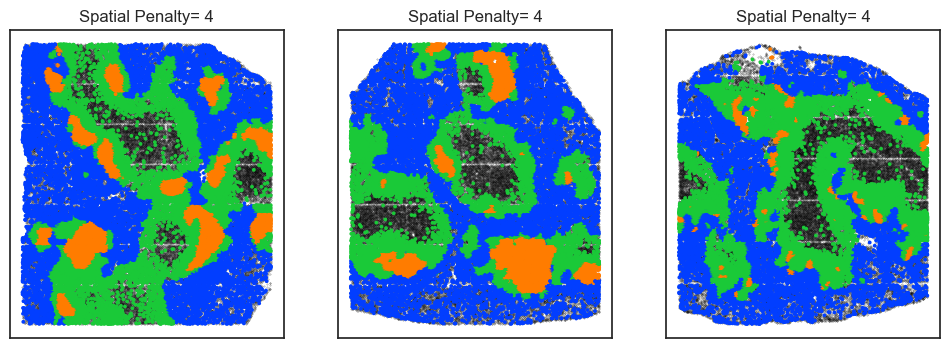

In [301]:
sns.set_style("white")
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_bcell_topic_multicolor(
    axes[0], "BALBc-1", spleen_tscore_w_b1[3], spleen_df, spleen_names["BALBc-1"], 4
)
plot_bcell_topic_multicolor(
    axes[1], "BALBc-2", spleen_tscore_w_b2[3], spleen_df, spleen_names["BALBc-2"], 4
)
plot_bcell_topic_multicolor(
    axes[2], "BALBc-3", spleen_tscore_w_b3[3], spleen_df, spleen_names["BALBc-3"], 4
)

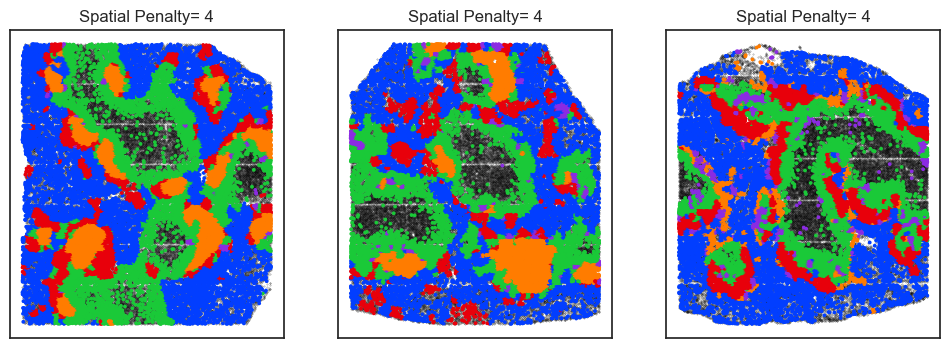

In [302]:
sns.set_style("white")
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_bcell_topic_multicolor(
    axes[0], "BALBc-1", spleen_tscore_w_b1[5], spleen_df, spleen_names["BALBc-1"], 4
)
plot_bcell_topic_multicolor(
    axes[1], "BALBc-2", spleen_tscore_w_b2[5], spleen_df, spleen_names["BALBc-2"], 4
)
plot_bcell_topic_multicolor(
    axes[2], "BALBc-3", spleen_tscore_w_b3[5], spleen_df, spleen_names["BALBc-3"], 4
)

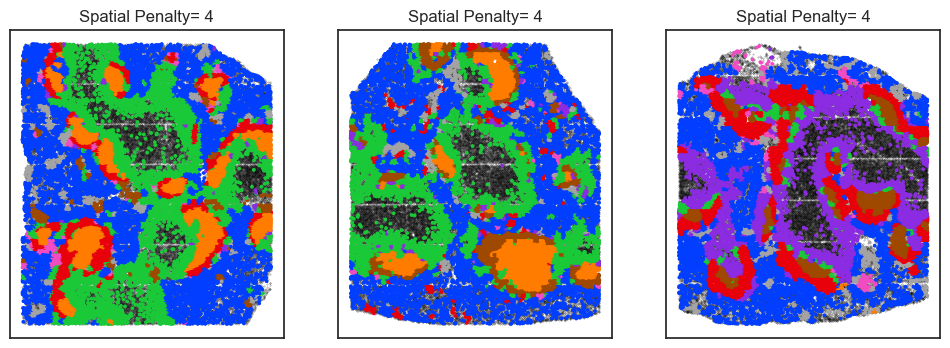

In [303]:
sns.set_style("white")
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_bcell_topic_multicolor(
    axes[0], "BALBc-1", spleen_tscore_w_b1[8], spleen_df, spleen_names["BALBc-1"], 4
)
plot_bcell_topic_multicolor(
    axes[1], "BALBc-2", spleen_tscore_w_b2[8], spleen_df, spleen_names["BALBc-2"], 4
)
plot_bcell_topic_multicolor(
    axes[2], "BALBc-3", spleen_tscore_w_b3[8], spleen_df, spleen_names["BALBc-3"], 4
)

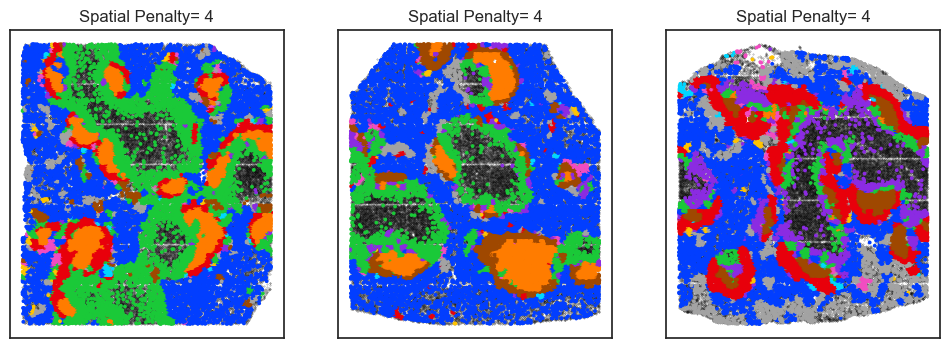

In [304]:
sns.set_style("white")
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_bcell_topic_multicolor(
    axes[0], "BALBc-1", spleen_tscore_w_b1[10], spleen_df, spleen_names["BALBc-1"], 4
)
plot_bcell_topic_multicolor(
    axes[1], "BALBc-2", spleen_tscore_w_b2[10], spleen_df, spleen_names["BALBc-2"], 4
)
plot_bcell_topic_multicolor(
    axes[2], "BALBc-3", spleen_tscore_w_b3[10], spleen_df, spleen_names["BALBc-3"], 4
)

# Compare SLDA TopicScore Weights

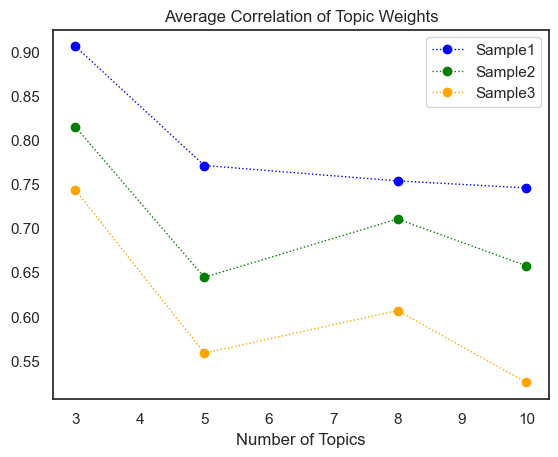

In [328]:
avg_corr_1 = get_avg_corr(spleen_slda_w_b1, spleen_tscore_w_b1, n_topics)
avg_corr_2 = get_avg_corr(spleen_slda_w_b2, spleen_tscore_w_b2, n_topics)
avg_corr_3 = get_avg_corr(spleen_slda_w_b3, spleen_tscore_w_b3, n_topics)

N_TOPICS_LIST = [3, 5, 8, 10]
plt.plot(
    N_TOPICS_LIST, avg_corr_1, linestyle=":", color="blue", marker="o", label="Sample1"
)
plt.plot(
    N_TOPICS_LIST, avg_corr_2, linestyle=":", color="green", marker="o", label="Sample2"
)
plt.plot(
    N_TOPICS_LIST,
    avg_corr_3,
    linestyle=":",
    color="orange",
    marker="o",
    label="Sample3",
)
plt.title("Average Correlation of Topic Weights")
plt.xlabel("Number of Topics")
plt.legend()
plt.show()

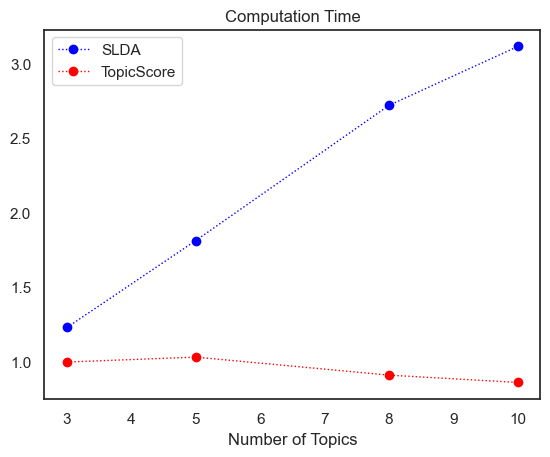

In [330]:
time_1 = [0.997, 1.03, 0.909, 0.86]
time_2 = [1.229, 1.812, 2.719, 3.114]

N_TOPICS_LIST = [3, 5, 8, 10]
plt.plot(N_TOPICS_LIST, time_2, linestyle=":", color="blue", marker="o", label="SLDA")
plt.plot(
    N_TOPICS_LIST, time_1, linestyle=":", color="red", marker="o", label="TopicScore"
)
plt.title("Computation Time")
plt.xlabel("Number of Topics")
plt.legend()
plt.show()

# Get Performance Metrics

In [262]:
PAS_TS_b1 = []
M_TS_b1 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_tscore_w_b1[n_topic], spleen_edge["BALBc-1"]).item()
    moran_value = moran(spleen_tscore_w_b1[n_topic], spleen_edge["BALBc-1"])
    PAS_TS_b1.append(pas_value)
    M_TS_b1.append(moran_value)
PAS_TS_b2 = []
M_TS_b2 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_tscore_w_b2[n_topic], spleen_edge["BALBc-2"]).item()
    moran_value = moran(spleen_tscore_w_b2[n_topic], spleen_edge["BALBc-2"])
    PAS_TS_b2.append(pas_value)
    M_TS_b2.append(moran_value)
PAS_TS_b3 = []
M_TS_b3 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_tscore_w_b3[n_topic], spleen_edge["BALBc-3"]).item()
    moran_value = moran(spleen_tscore_w_b3[n_topic], spleen_edge["BALBc-3"])
    PAS_TS_b3.append(pas_value)
    M_TS_b3.append(moran_value)

In [263]:
PAS_SLDA_b1 = []
M_SLDA_b1 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_slda_w_b1[n_topic], spleen_edge["BALBc-1"]).item()
    moran_value = moran(spleen_slda_w_b1[n_topic], spleen_edge["BALBc-1"])
    PAS_SLDA_b1.append(pas_value)
    M_SLDA_b1.append(moran_value)

PAS_SLDA_b2 = []
M_SLDA_b2 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_slda_w_b2[n_topic], spleen_edge["BALBc-2"]).item()
    moran_value = moran(spleen_slda_w_b2[n_topic], spleen_edge["BALBc-2"])
    PAS_SLDA_b2.append(pas_value)
    M_SLDA_b2.append(moran_value)

PAS_SLDA_b3 = []
M_SLDA_b3 = []
for i, n_topic in enumerate(n_topics):
    pas_value = get_PAS(spleen_slda_w_b3[n_topic], spleen_edge["BALBc-3"]).item()
    moran_value = moran(spleen_slda_w_b3[n_topic], spleen_edge["BALBc-3"])
    PAS_SLDA_b3.append(pas_value)
    M_SLDA_b3.append(moran_value)

## PAS score

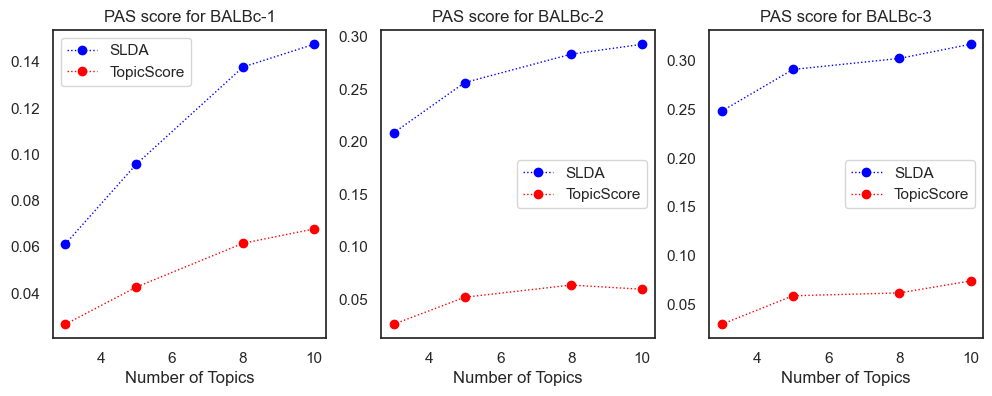

In [266]:
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_score(axes[0], PAS_SLDA_b1, PAS_TS_b1, n_topics, "PAS", "BALBc-1")
plot_score(axes[1], PAS_SLDA_b2, PAS_TS_b2, n_topics, "PAS", "BALBc-2")
plot_score(axes[2], PAS_SLDA_b3, PAS_TS_b3, n_topics, "PAS", "BALBc-3")

## Global Moran's I

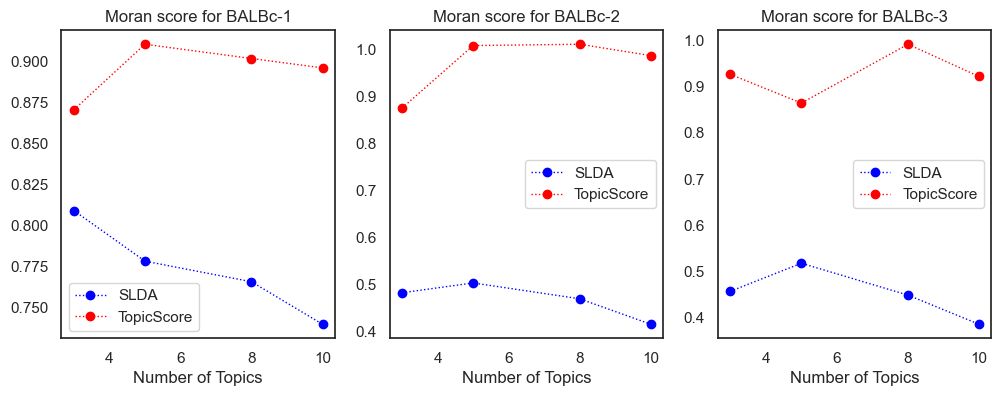

In [267]:
_, axes = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
plot_score(axes[0], M_SLDA_b1, M_TS_b1, n_topics, "Moran", "BALBc-1")
plot_score(axes[1], M_SLDA_b2, M_TS_b2, n_topics, "Moran", "BALBc-2")
plot_score(axes[2], M_SLDA_b3, M_TS_b3, n_topics, "Moran", "BALBc-3")

## Miscell

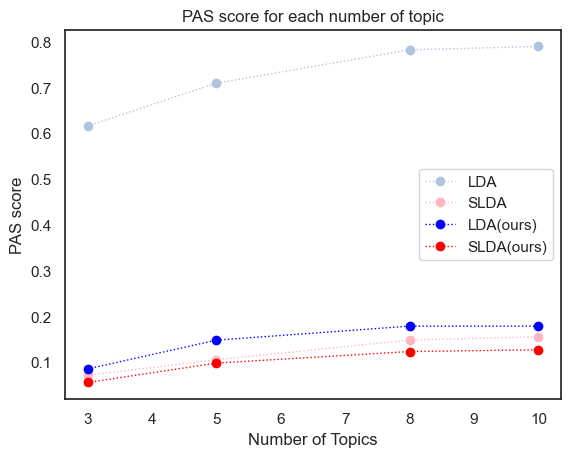

In [96]:
N_TOPICS_LIST = [3, 5, 8, 10]
PAS_LDA1 = [0.61535598, 0.70897531, 0.78171717, 0.78916318]
PAS_SLDA1 = [0.07127669, 0.10512886, 0.1481954, 0.15536843]
PAS_LDA2 = [PAS_3_0, PAS_5_0, PAS_8_0, PAS_8_0]
PAS_SLDA2 = [PAS_3_2, PAS_5_2, PAS_8_2, PAS_10_2]
plt.plot(
    N_TOPICS_LIST,
    PAS_LDA1,
    linestyle=":",
    color="lightsteelblue",
    marker="o",
    label="LDA",
)
plt.plot(
    N_TOPICS_LIST, PAS_SLDA1, linestyle=":", color="lightpink", marker="o", label="SLDA"
)
plt.plot(
    N_TOPICS_LIST, PAS_LDA2, linestyle=":", color="blue", marker="o", label="LDA(ours)"
)
plt.plot(
    N_TOPICS_LIST, PAS_SLDA2, linestyle=":", color="red", marker="o", label="SLDA(ours)"
)
plt.title("PAS score for each number of topic")
plt.xlabel("Number of Topics")
plt.ylabel("PAS score")
plt.legend()
plt.show()

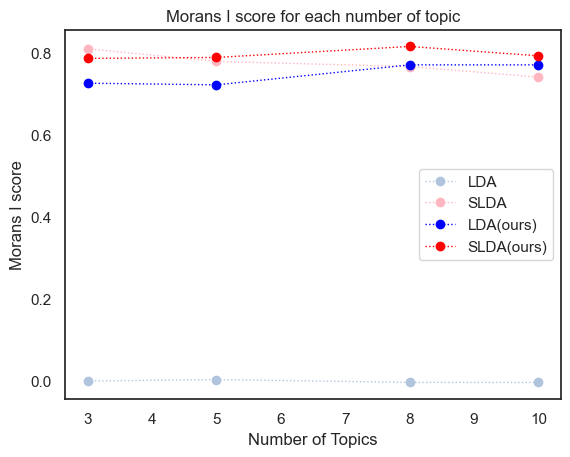

In [97]:
N_TOPICS_LIST = [3, 5, 8, 10]
M_LDA1 = [-0.0009294, 0.00271830, -0.00414, -0.0043299]
M_SLDA1 = [
    0.809116908377209,
    0.7783808180130299,
    0.7658415769248457,
    0.7400013841401097,
]
M_LDA2 = [M_3_0, M_5_0, M_8_0, M_8_0]
M_SLDA2 = [M_3_2, M_5_2, M_8_2, M_10_2]
plt.plot(
    N_TOPICS_LIST,
    M_LDA1,
    linestyle=":",
    color="lightsteelblue",
    marker="o",
    label="LDA",
)
plt.plot(
    N_TOPICS_LIST, M_SLDA1, linestyle=":", color="lightpink", marker="o", label="SLDA"
)
plt.plot(
    N_TOPICS_LIST, M_LDA2, linestyle=":", color="blue", marker="o", label="LDA(ours)"
)
plt.plot(
    N_TOPICS_LIST, M_SLDA2, linestyle=":", color="red", marker="o", label="SLDA(ours)"
)
plt.title("Morans I score for each number of topic")
plt.xlabel("Number of Topics")
plt.ylabel("Morans I score")
plt.legend()
plt.show()

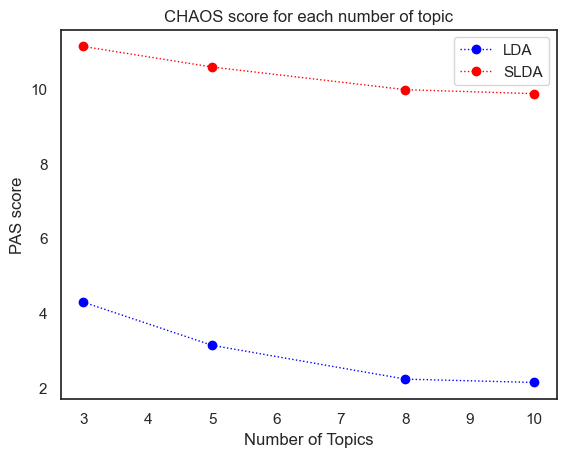

In [296]:
N_TOPICS_LIST = [3, 5, 8, 10]
PAS_LDA1 = [
    4.286094160139627,
    3.1298701417232375,
    2.2245005563896325,
    2.1356841318455704,
]
PAS_SLDA1 = [
    11.13087706065457,
    10.579624959360064,
    9.973791370019862,
    9.866661266597992,
]
plt.plot(N_TOPICS_LIST, PAS_LDA1, linestyle=":", color="blue", marker="o", label="LDA")
plt.plot(N_TOPICS_LIST, PAS_SLDA1, linestyle=":", color="red", marker="o", label="SLDA")
plt.title("CHAOS score for each number of topic")
plt.xlabel("Number of Topics")
plt.ylabel("PAS score")
plt.legend()
plt.show()